In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import joblib

In [2]:
# Importing the dataset
df = pd.read_csv("german_credit_data.csv")
df.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

In [3]:
# Data Exploration and Preprocessing:
# Identifying the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
# Exploring the dataset further
df.describe(include='all')

Unnamed: 0          Age   Sex          Job Housing Saving accounts  \
count   1000.000000  1000.000000  1000  1000.000000    1000             817   
unique          NaN          NaN     2          NaN       3               4   
top             NaN          NaN  male          NaN     own          little   
freq            NaN          NaN   690          NaN     713             603   
mean     499.500000    35.546000   NaN     1.904000     NaN             NaN   
std      288.819436    11.375469   NaN     0.653614     NaN             NaN   
min        0.000000    19.000000   NaN     0.000000     NaN             NaN   
25%      249.750000    27.000000   NaN     2.000000     NaN             NaN   
50%      499.500000    33.000000   NaN     2.000000     NaN             NaN   
75%      749.250000    42.000000   NaN     2.000000     NaN             NaN   
max      999.000000    75.000000   NaN     3.000000     NaN             NaN   

       Checking account  Credit amount     Duration Purpose  Risk  
count               606    1000.000000  1000.000000    1000  1000  
unique                3            NaN          NaN       8     2  
top              little            NaN          NaN     car  good  
freq                274            NaN          NaN     337   700  
mean                NaN    3271.258000    20.903000     NaN   NaN  
std                 NaN    2822.736876    12.058814     NaN   NaN  
min                 NaN     250.000000     4.000000     NaN   NaN  
25%                 NaN    1365.500000    12.000000     NaN   NaN  
50%                 NaN    2319.500000    18.000000     NaN   NaN  
75%                 NaN    3972.250000    24.000000     NaN   NaN  
max                 NaN   18424.000000    72.000000     NaN   NaN

In [5]:
# Checking for Unique Values
df.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

In [6]:
# Check for missing values
df.isnull().values.any()

True

In [7]:
# Identifying the number of missing values
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [8]:
df_cleaned = df.drop(columns = ["Unnamed: 0"])
df_cleaned["Saving accounts"] = df_cleaned["Saving accounts"].fillna("no_info")
df_cleaned["Checking account"] = df_cleaned["Checking account"].fillna("no_info")
df_cleaned

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0     67    male    2     own         no_info           little           1169   
1     22  female    2     own          little         moderate           5951   
2     49    male    1     own          little          no_info           2096   
3     45    male    2    free          little           little           7882   
4     53    male    2    free          little           little           4870   
..   ...     ...  ...     ...             ...              ...            ...   
995   31  female    1     own          little          no_info           1736   
996   40    male    3     own          little           little           3857   
997   38    male    2     own          little          no_info            804   
998   23    male    2    free          little           little           1845   
999   27    male    2     own        moderate         moderate           4576   

     Duration              Purpose  Risk  
0           6             radio/TV  good  
1          48             radio/TV   bad  
2          12            education  good  
3          42  furniture/equipment  good  
4          24                  car   bad  
..        ...                  ...   ...  
995        12  furniture/equipment  good  
996        30                  car  good  
997        12             radio/TV  good  
998        45             radio/TV   bad  
999        45                  car  good  

[1000 rows x 10 columns]

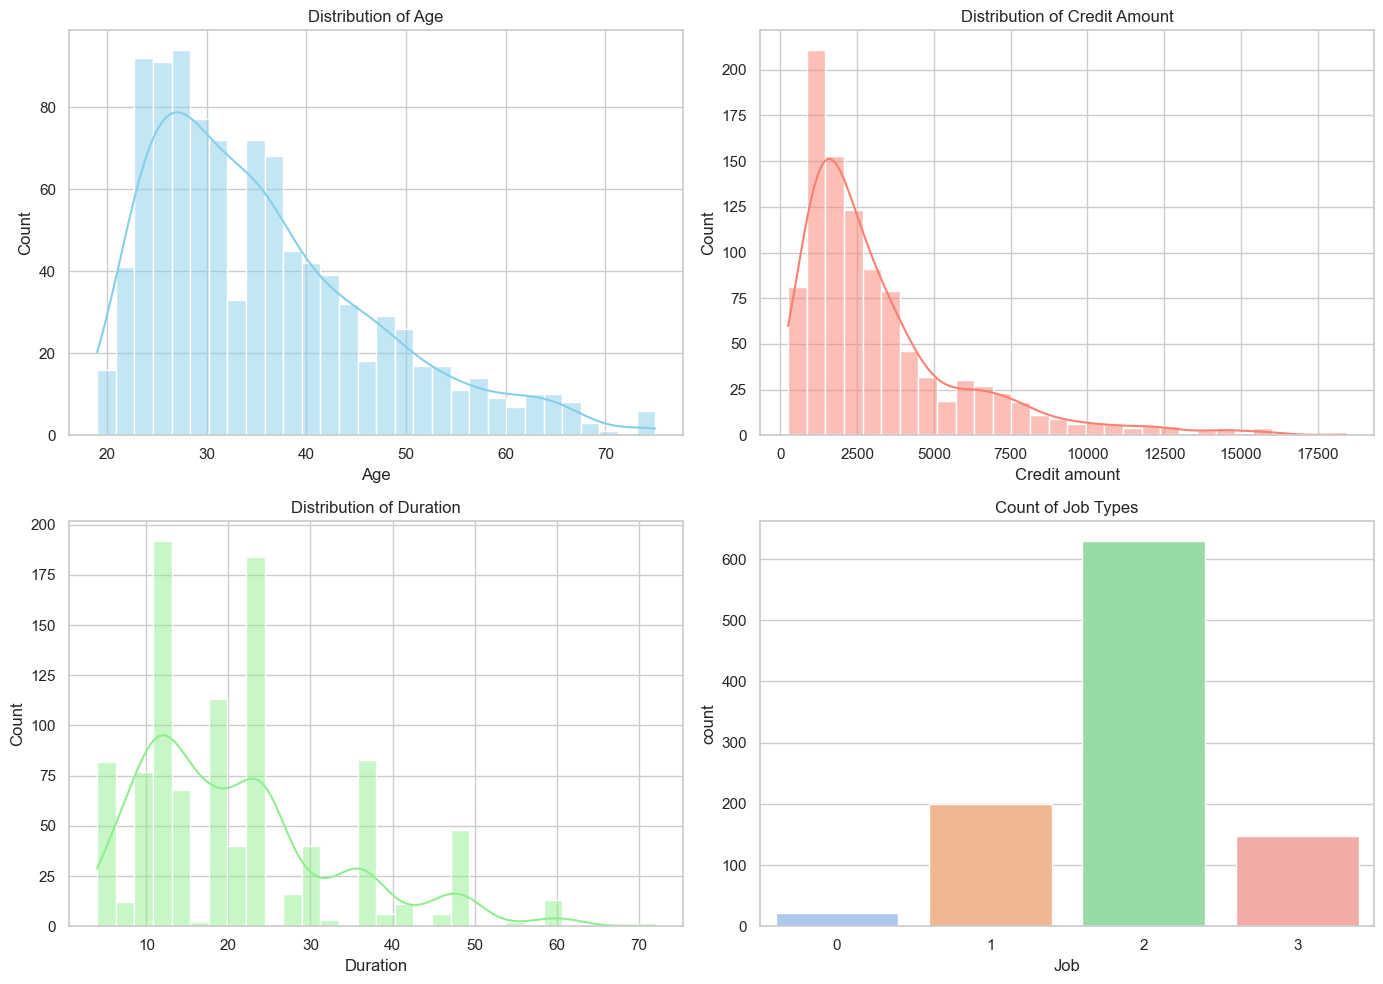

In [9]:
# Exploratory Data Analysis- Data Visualization
# Set plot style
sns.set(style="whitegrid")

# Create subplots for numeric distributions
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution
sns.histplot(data=df_cleaned, x="Age", bins=30, kde=True, ax=axs[0, 0], color="skyblue")
axs[0, 0].set_title("Distribution of Age")

# Credit Amount distribution
sns.histplot(data=df_cleaned, x="Credit amount", bins=30, kde=True, ax=axs[0, 1], color="salmon")
axs[0, 1].set_title("Distribution of Credit Amount")

# Duration distribution
sns.histplot(data=df_cleaned, x="Duration", bins=30, kde=True, ax=axs[1, 0], color="lightgreen")
axs[1, 0].set_title("Distribution of Duration")

# Job distribution
sns.countplot(data=df_cleaned, x="Job", ax=axs[1, 1], hue="Job", palette="pastel", legend=False)
axs[1, 1].set_title("Count of Job Types")

plt.tight_layout()
plt.show()

In [10]:
# Encoding the Categorical Values to Train the Model.
## Label Encoding for Sex, Risk
## One-Hot Encoding for Housing, Saving accounts, Checking account, Purpose.

# Label Encoding
df_cleaned['Sex'] = df_cleaned['Sex'].map({'male': 0, 'female': 1})
df_cleaned['Risk'] = df_cleaned['Risk'].map({'good': 0, 'bad': 1})

# One-Hot Encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Housing', 'Saving accounts', 'Checking account', 'Purpose'], drop_first=True)
df_encoded

Age  Sex  Job  Credit amount  Duration  Risk  Housing_own  Housing_rent  \
0     67    0    2           1169         6     0         True         False   
1     22    1    2           5951        48     1         True         False   
2     49    0    1           2096        12     0         True         False   
3     45    0    2           7882        42     0        False         False   
4     53    0    2           4870        24     1        False         False   
..   ...  ...  ...            ...       ...   ...          ...           ...   
995   31    1    1           1736        12     0         True         False   
996   40    0    3           3857        30     0         True         False   
997   38    0    2            804        12     0         True         False   
998   23    0    2           1845        45     1        False         False   
999   27    0    2           4576        45     0         True         False   

     Saving accounts_moderate  Saving accounts_no_info  ...  \
0                       False                     True  ...   
1                       False                    False  ...   
2                       False                    False  ...   
3                       False                    False  ...   
4                       False                    False  ...   
..                        ...                      ...  ...   
995                     False                    False  ...   
996                     False                    False  ...   
997                     False                    False  ...   
998                     False                    False  ...   
999                      True                    False  ...   

     Checking account_moderate  Checking account_no_info  \
0                        False                     False   
1                         True                     False   
2                        False                      True   
3                        False                     False   
4                        False                     False   
..                         ...                       ...   
995                      False                      True   
996                      False                     False   
997                      False                      True   
998                      False                     False   
999                       True                     False   

     Checking account_rich  Purpose_car  Purpose_domestic appliances  \
0                    False        False                        False   
1                    False        False                        False   
2                    False        False                        False   
3                    False        False                        False   
4                    False         True                        False   
..                     ...          ...                          ...   
995                  False        False                        False   
996                  False         True                        False   
997                  False        False                        False   
998                  False        False                        False   
999                  False         True                        False   

     Purpose_education  Purpose_furniture/equipment  Purpose_radio/TV  \
0                False                        False              True   
1                False                        False              True   
2                 True                        False             False   
3                False                         True             False   
4                False                        False             False   
..                 ...                          ...               ...   
995              False                         True             False   
996              False                        False             False   
997              False                      

In [11]:
# Binning
df_encoded['Age_group'] = pd.cut(df_encoded['Age'], bins=[18, 25, 35, 50, 75], labels=['Young', 'Adult', 'Senior', 'Elder'])
df_encoded['Credit_bin'] = pd.qcut(df_encoded['Credit amount'], q=4, labels=['Low', 'Medium', 'High', 'Very_High'])

# One-hot encode bins
df_encoded = pd.get_dummies(df_encoded, columns=['Age_group', 'Credit_bin'], drop_first=True)
df_encoded

Age  Sex  Job  Credit amount  Duration  Risk  Housing_own  Housing_rent  \
0     67    0    2           1169         6     0         True         False   
1     22    1    2           5951        48     1         True         False   
2     49    0    1           2096        12     0         True         False   
3     45    0    2           7882        42     0        False         False   
4     53    0    2           4870        24     1        False         False   
..   ...  ...  ...            ...       ...   ...          ...           ...   
995   31    1    1           1736        12     0         True         False   
996   40    0    3           3857        30     0         True         False   
997   38    0    2            804        12     0         True         False   
998   23    0    2           1845        45     1        False         False   
999   27    0    2           4576        45     0         True         False   

     Saving accounts_moderate  Saving accounts_no_info  ...  \
0                       False                     True  ...   
1                       False                    False  ...   
2                       False                    False  ...   
3                       False                    False  ...   
4                       False                    False  ...   
..                        ...                      ...  ...   
995                     False                    False  ...   
996                     False                    False  ...   
997                     False                    False  ...   
998                     False                    False  ...   
999                      True                    False  ...   

     Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
0                          False              True            False   
1                          False              True            False   
2                          False             False            False   
3                           True             False            False   
4                          False             False            False   
..                           ...               ...              ...   
995                         True             False            False   
996                        False             False            False   
997                        False              True            False   
998                        False              True            False   
999                        False             False            False   

     Purpose_vacation/others  Age_group_Adult  Age_group_Senior  \
0                      False            False             False   
1                      False            False             False   
2                      False            False              True   
3                      False            False              True   
4                      False            False             False   
..                       ...              ...               ...   
995                    False             True             False   
996                    False            False              True   
997                    False            False              True   
998                    False            False             False   
999                    False             True             False   

     Age_group_Elder  Credit_bin_Medium  Credit_bin_High  Credit_bin_Very_High  
0               True              False            False                 False  
1              False              False            False                  True  
2              False               True            False                 False  
3              False              False            False                  True  
4               True              False            False                  True  
..               ...                ...              ...                   ...  
995            False               True            False      

In [12]:
# Finding correlation
correlation = df_encoded.corr()['Risk'].drop('Risk').sort_values(ascending = False)
correlation

Duration                       0.214927
Credit amount                  0.154739
Credit_bin_Very_High           0.151186
Checking account_moderate      0.119581
Housing_rent                   0.092785
Sex                            0.075493
Purpose_education              0.049085
Job                            0.032735
Purpose_vacation/others        0.028058
Purpose_car                    0.022621
Saving accounts_moderate       0.022255
Purpose_furniture/equipment    0.020971
Purpose_repairs                0.020828
Purpose_domestic appliances    0.008016
Age_group_Adult               -0.006241
Age_group_Elder               -0.019989
Checking account_rich         -0.044009
Credit_bin_Medium             -0.065514
Saving accounts_quite rich    -0.070954
Saving accounts_rich          -0.085749
Age_group_Senior              -0.089133
Age                           -0.091127
Credit_bin_High               -0.095751
Purpose_radio/TV              -0.106922
Saving accounts_no_info       -0.129238


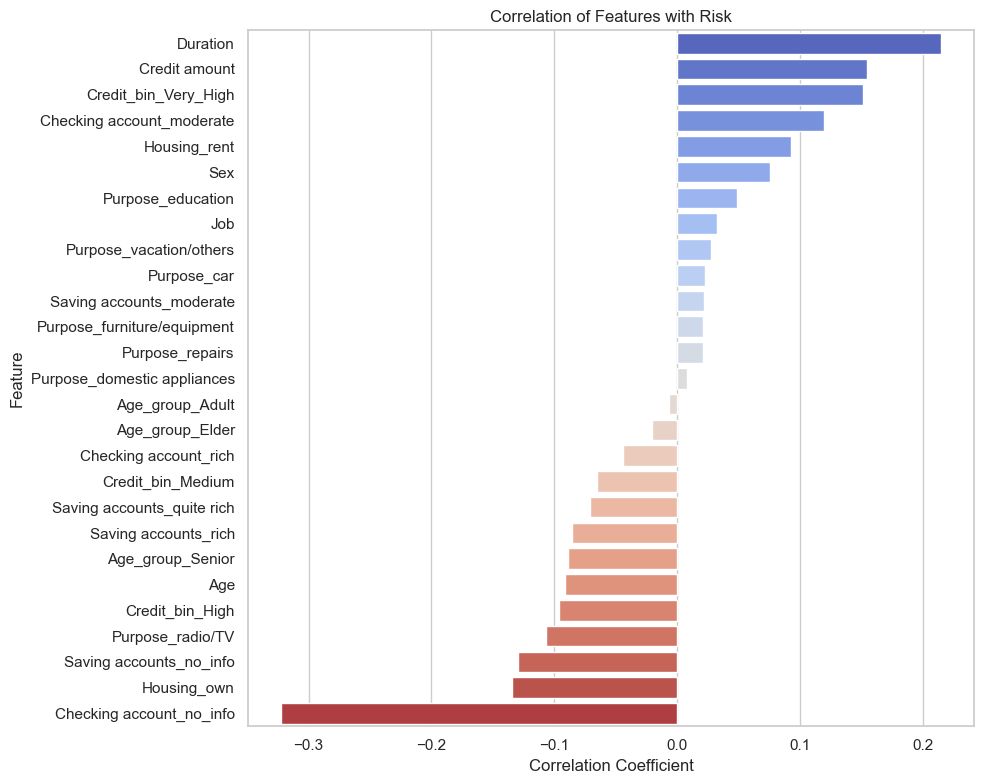

In [13]:
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm', hue = correlation.index, legend = False)
plt.title('Correlation of Features with Risk')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [14]:
# Splitting the dataset
X = df_encoded.drop(columns=['Risk'])
y = df_encoded['Risk']

# Check class distribution
print("Class distribution:\n", y.value_counts(normalize=True))

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Class distribution:
 Risk
0    0.7
1    0.3
Name: proportion, dtype: float64


In [15]:
# Initialize models
from sklearn.calibration import CalibratedClassifierCV

# Keep a reference to the original RF model for feature importances
rf_base_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model = CalibratedClassifierCV(rf_base_model, cv=5)
rf_model.fit(X_train, y_train)

# Initialize other models
log_model = LogisticRegression(class_weight='balanced', random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=2, random_state=42)

log_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [16]:
voting_clf = VotingClassifier(estimators=[
    ('logreg', log_model), 
    ('rf', rf_model), 
    ('xgb', xgb_model)
], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42)),
                             ('rf',
                              CalibratedClassifierCV(cv=5,
                                                     estimator=RandomForestClassifier(class_weight='balanced',
                                                                                      random_state=42))),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=N...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

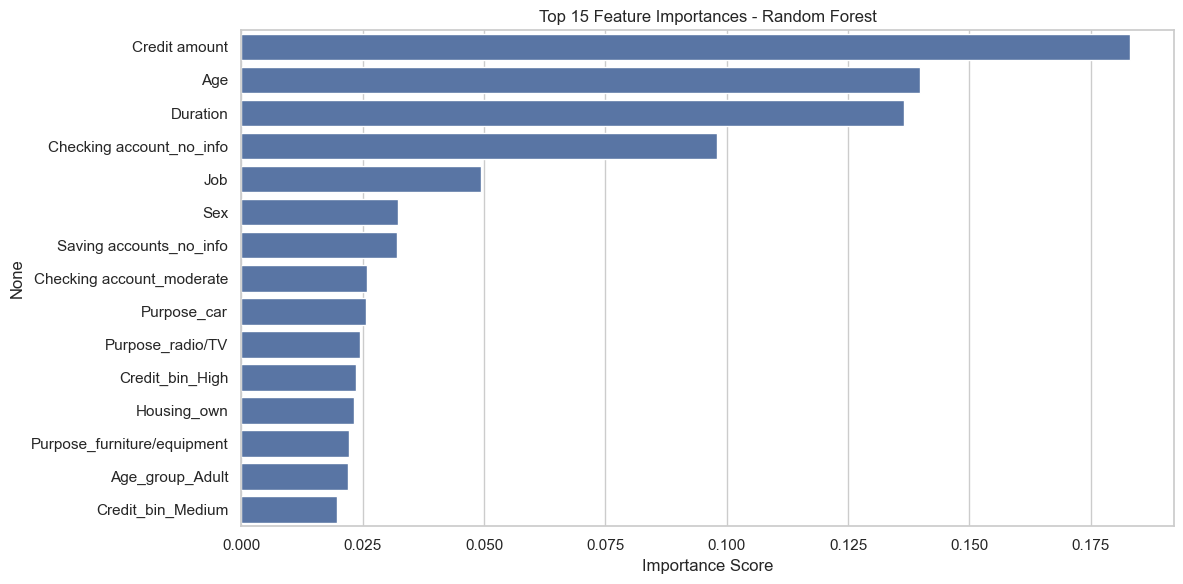

In [17]:
# Train rf_base_model separately to extract feature importances
rf_base_model.fit(X_train, y_train)  # Fit it separately

importances = rf_base_model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       140
           1       0.48      0.72      0.57        60

    accuracy                           0.68       200
   macro avg       0.66      0.69      0.66       200
weighted avg       0.74      0.68      0.69       200

ROC-AUC Score: 0.7633333333333334
Logistic Regression - Confusion Matrix


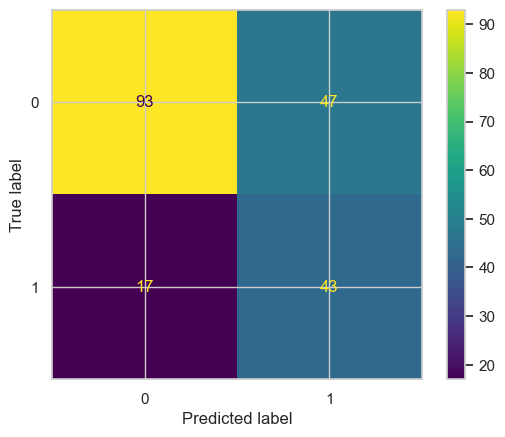


Random Forest
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       140
           1       0.75      0.35      0.48        60

    accuracy                           0.77       200
   macro avg       0.76      0.65      0.66       200
weighted avg       0.77      0.77      0.74       200

ROC-AUC Score: 0.7729761904761905
Random Forest - Confusion Matrix


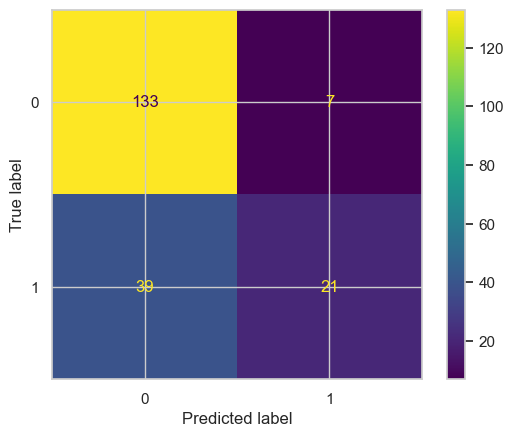


XGBoost
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       140
           1       0.61      0.57      0.59        60

    accuracy                           0.76       200
   macro avg       0.71      0.70      0.71       200
weighted avg       0.76      0.76      0.76       200

ROC-AUC Score: 0.7633333333333334
XGBoost - Confusion Matrix


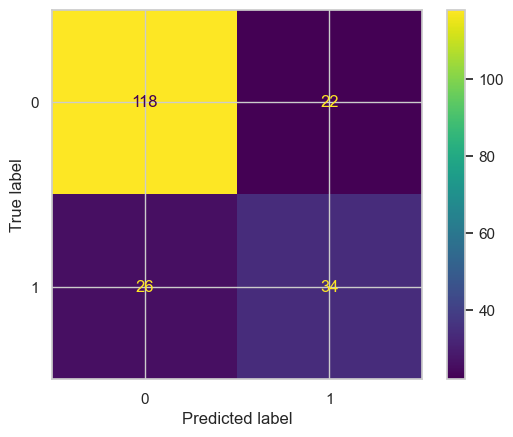


Voting Classifier
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       140
           1       0.62      0.57      0.59        60

    accuracy                           0.77       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.76      0.77      0.76       200

ROC-AUC Score: 0.7754761904761905
Voting Classifier - Confusion Matrix


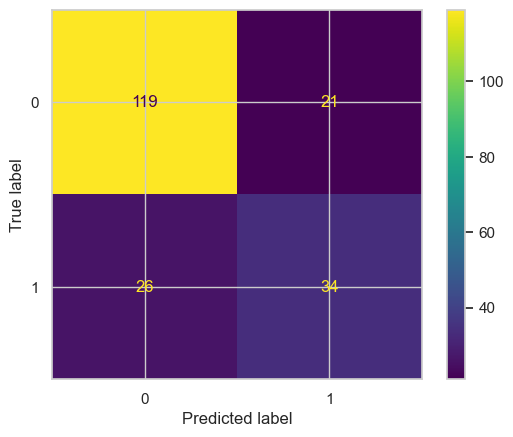

In [18]:
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "Voting Classifier": voting_clf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
    print(f"{name} - Confusion Matrix")
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

In [19]:
# Save model and scaler
# Save feature names
feature_names = X.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(voting_clf, "voting_model.pkl")
print("Scaler and model saved successfully.")

Scaler and model saved successfully.
